In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Load data from csv 
trial1_results = np.loadtxt("baseline_cumulative_reward_2.txt", dtype=int)
trial2_results = np.loadtxt("baseline_cumulative_reward_3.txt", dtype=int)
trial3_results = np.loadtxt("baseline_cumulative_reward_4.txt", dtype=int)

In [3]:
trial1_results

array([      0,     900,    1800, ..., -443700, -443700, -443700])

## Analyse per timestep rewards

In [4]:
timeStop = 3000

In [5]:
trial1_rewards = trial1_results.tolist()
trial1_rewards = trial1_rewards[:timeStop]

In [6]:
trial2_rewards = trial2_results.tolist()
trial2_rewards = trial2_rewards[:timeStop]

In [7]:
trial3_rewards = trial3_results.tolist()
trial3_rewards = trial3_rewards[:timeStop]

In [8]:
data = {'Trial 1': trial1_rewards, 'Trial 2': trial2_rewards, 'Trial 3': trial3_rewards}
rewards_DF = pd.DataFrame(data=data)
rewards_DF

,Trial 1,Trial 2,Trial 3
0,0,0,0
1,900,1000,1000
2,1800,1900,2000
3,2700,2700,2900
4,3500,3500,3800
...,...,...,...
2995,-444700,-631400,-531900
2996,-444700,-630400,-531400
2997,-443700,-629500,-530900
2998,-443700,-628700,-533900


In [9]:
rewards_DF['mean'] = rewards_DF.mean(axis=1)
rewards_DF

,Trial 1,Trial 2,Trial 3,mean
0,0,0,0,0.000000
1,900,1000,1000,966.666667
2,1800,1900,2000,1900.000000
3,2700,2700,2900,2766.666667
4,3500,3500,3800,3600.000000
...,...,...,...,...
2995,-444700,-631400,-531900,-536000.000000
2996,-444700,-630400,-531400,-535500.000000
2997,-443700,-629500,-530900,-534700.000000
2998,-443700,-628700,-533900,-535433.333333


In [10]:
rewards_DF['Standard Deviation'] = rewards_DF[['Trial 1','Trial 2', 'Trial 3']].std(axis=1)
rewards_DF

,Trial 1,Trial 2,Trial 3,mean,Standard Deviation
0,0,0,0,0.000000,0.000000
1,900,1000,1000,966.666667,57.735027
2,1800,1900,2000,1900.000000,100.000000
3,2700,2700,2900,2766.666667,115.470054
4,3500,3500,3800,3600.000000,173.205081
...,...,...,...,...,...
2995,-444700,-631400,-531900,-536000.000000,93417.503713
2996,-444700,-630400,-531400,-535500.000000,92917.866958
2997,-443700,-629500,-530900,-534700.000000,92958.270208
2998,-443700,-628700,-533900,-535433.333333,92509.531041


In [11]:
rewards_upper = []
rewards_lower = []
for index, row in rewards_DF.iterrows():
    meanReward = row['mean']
    stdev = row['Standard Deviation']
    maxReward = meanReward + stdev
    rewards_upper.append(maxReward)
    minReward = meanReward - stdev
    rewards_lower.append(minReward)

In [12]:
rewards_mean = rewards_DF['mean'].tolist()
rewards_mean

[0.0,
 966.6666666666666,
 1900.0,
 2766.6666666666665,
 3600.0,
 4233.333333333333,
 3666.6666666666665,
 3100.0,
 2533.3333333333335,
 1966.6666666666667,
 1400.0,
 -433.3333333333333,
 -2266.6666666666665,
 -3266.6666666666665,
 -2933.3333333333335,
 -2600.0,
 -2333.3333333333335,
 -2066.6666666666665,
 -1800.0,
 -1566.6666666666667,
 -1333.3333333333333,
 -1100.0,
 -966.6666666666666,
 -866.6666666666666,
 -866.6666666666666,
 -2033.3333333333333,
 -3200.0,
 -4366.666666666667,
 -6700.0,
 -9033.333333333334,
 -10033.333333333334,
 -11033.333333333334,
 -10733.333333333334,
 -10466.666666666666,
 -10233.333333333334,
 -10000.0,
 -9766.666666666666,
 -9533.333333333334,
 -9400.0,
 -9266.666666666666,
 -8466.666666666666,
 -7666.666666666667,
 -8033.333333333333,
 -8400.0,
 -8800.0,
 -9200.0,
 -9633.333333333334,
 -10100.0,
 -10566.666666666666,
 -11033.333333333334,
 -10166.666666666666,
 -9333.333333333334,
 -8733.333333333334,
 -8233.333333333334,
 -7733.333333333333,
 -7233.333333

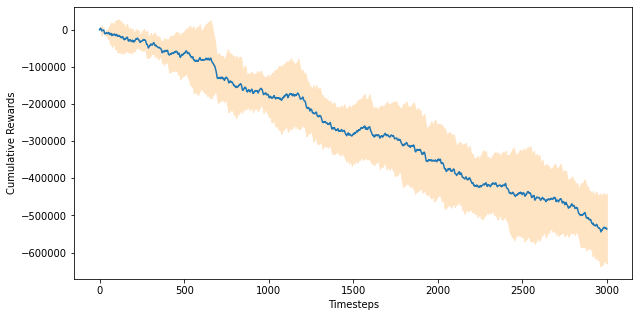

In [26]:
#plot graph 
x = [i for i in range(timeStop)]
plt.figure(figsize=(10, 5))
plt.plot(x, rewards_mean)
plt.fill_between(x, rewards_upper, rewards_lower, color='bisque')
plt.xlabel('Timesteps')
plt.ylabel('Cumulative Rewards')
plt.show()

## Get state information from rewards

In [14]:
def find_states(data):
    reward = [1000,900,800,500,-500,-500,-500,-500,-3000,-1000]

    states = [0]

    for index in range(1,len(data)):
        diff = data[index]-data[index-1]

        if diff > 0 or diff < -600:
            states.append(reward.index(diff))
        else:
            previous_state = states[index-1]
            if previous_state in [0,1,2,3]:
                states.append(previous_state+4)
            else:
                states.append(previous_state)
    return states

In [15]:
#find states
trial1_states = find_states(trial1_rewards)
trial1_states

[0,
 1,
 1,
 1,
 2,
 3,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 3,
 3,
 3,
 3,
 8,
 8,
 0,
 0,
 1,
 1,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 0,
 1,
 2,
 3,
 3,
 3,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 0,
 0,
 1,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 0,
 1,
 1,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 8,
 8,
 8,
 8,
 8,
 0,
 1,
 1,
 2,
 2,
 2,
 3,
 3,
 8,
 8,
 8,
 8,
 8,
 0,
 0,
 0,
 1,
 2,
 2,
 3,
 3,
 8,
 0,
 1,
 1,
 1,
 2,
 2,
 3,
 8,
 0,
 1,
 2,
 3,
 8,
 0,
 0,
 0,
 0,
 1,
 2,
 2,
 2,
 3,
 8,
 8,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 2,
 2,
 2,
 3,
 3,
 8,
 8,
 8,
 0,
 0,
 0,
 1,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 8,
 8,
 8,
 8,
 8,
 0,
 1,
 1,
 1,
 2,
 3,
 3,
 3,
 3,
 8,
 8,
 0,
 1,
 1,
 1,
 1,
 1,
 2,
 3,
 8,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 3,
 8,
 0,
 0,
 0,
 9,
 9,
 9,
 0,
 0,
 0,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 8,
 0,
 1,
 1,
 1,
 1,
 2,
 2,
 3,
 3,
 3,
 3,
 8,
 8,
 0,
 1,
 1,
 1,
 2,
 3,
 8,
 8,
 0,
 1,
 1,


In [16]:
trial2_states = find_states(trial2_rewards)
trial3_states = find_states(trial3_rewards)

In [17]:
def failure_count(data):
    failures = 0
    states = find_states(data)

    failures = 0
    failure_flag = 0

    for state in states:
        if state == 8 and failure_flag == 0:
            failures +=1
            failure_flag = 1
        elif state != 8:
            failure_flag = 0
    return failures

In [18]:
trial1_failure = failure_count(trial1_rewards)
trial2_failure = failure_count(trial2_rewards)
trial3_failure = failure_count(trial3_rewards)
mean = (trial1_failure + trial2_failure + trial3_failure)/3
mean

159.66666666666666

## Analyse percentage of time in each state

In [19]:
def getStateCount(statelst, state):
    stateCount = 0
    for s in statelst:
        if s == state:
            stateCount += 1
    return stateCount

In [20]:
#state 0

#trial1
trial1_state0_count = getStateCount(trial1_states, 0)
trial1_state0_percentage = trial1_state0_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 1' % (0, trial1_state0_count, trial1_state0_percentage))

#trial2
trial2_state0_count = getStateCount(trial2_states, 0)
trial2_state0_percentage = trial2_state0_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 2' % (0, trial2_state0_count, trial2_state0_percentage))

#trial3
trial3_state0_count = getStateCount(trial3_states, 0)
trial3_state0_percentage = trial3_state0_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 3' % (0, trial3_state0_count, trial3_state0_percentage))

#average 
average_state0_count = (trial1_state0_count + trial2_state0_count + trial3_state0_count)/3
average_state0_percentage = average_state0_count/3000
print('Machine is in state %d for %.4f timesteps %.4f percentage of time on average' % (0, average_state0_count, average_state0_percentage))

Machine is in state 0 for 562 timesteps 0.1873 percentage of time in trial 1
Machine is in state 0 for 538 timesteps 0.1793 percentage of time in trial 2
Machine is in state 0 for 540 timesteps 0.1800 percentage of time in trial 3
Machine is in state 0 for 546.6667 timesteps 0.1822 percentage of time on average


In [21]:
#state 1

#trial1
trial1_state1_count = getStateCount(trial1_states, 1)
trial1_state1_percentage = trial1_state1_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 1' % (1, trial1_state1_count, trial1_state1_percentage))

#trial2
trial2_state1_count = getStateCount(trial2_states, 1)
trial2_state1_percentage = trial2_state1_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 2' % (1, trial2_state1_count, trial2_state1_percentage))

#trial3
trial3_state1_count = getStateCount(trial3_states, 1)
trial3_state1_percentage = trial3_state1_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 3' % (1, trial3_state1_count, trial3_state1_percentage))

#average 
average_state1_count = (trial1_state1_count + trial2_state1_count + trial3_state1_count)/3
average_state1_percentage = average_state1_count/3000
print('Machine is in state %d for %.4f timesteps %.4f percentage of time on average' % (1, average_state1_count, average_state1_percentage))

Machine is in state 1 for 518 timesteps 0.1727 percentage of time in trial 1
Machine is in state 1 for 547 timesteps 0.1823 percentage of time in trial 2
Machine is in state 1 for 509 timesteps 0.1697 percentage of time in trial 3
Machine is in state 1 for 524.6667 timesteps 0.1749 percentage of time on average


In [22]:
#state 2

#trial1
trial1_state2_count = getStateCount(trial1_states, 2)
trial1_state2_percentage = trial1_state2_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 1' % (2, trial1_state2_count, trial1_state2_percentage))

#trial2
trial2_state2_count = getStateCount(trial2_states, 2)
trial2_state2_percentage = trial2_state2_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 2' % (2, trial2_state2_count, trial2_state2_percentage))

#trial3
trial3_state2_count = getStateCount(trial3_states, 2)
trial3_state2_percentage = trial3_state2_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 3' % (2, trial3_state2_count, trial3_state2_percentage))

#average 
average_state2_count = (trial1_state2_count + trial2_state2_count + trial3_state2_count)/3
average_state2_percentage = average_state2_count/3000
print('Machine is in state %d for %.4f timesteps %.4f percentage of time on average' % (2, average_state2_count, average_state2_percentage))

Machine is in state 2 for 512 timesteps 0.1707 percentage of time in trial 1
Machine is in state 2 for 516 timesteps 0.1720 percentage of time in trial 2
Machine is in state 2 for 485 timesteps 0.1617 percentage of time in trial 3
Machine is in state 2 for 504.3333 timesteps 0.1681 percentage of time on average


In [23]:
#state 3

#trial1
trial1_state3_count = getStateCount(trial1_states, 3)
trial1_state3_percentage = trial1_state3_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 1' % (3, trial1_state3_count, trial1_state3_percentage))

#trial2
trial2_state3_count = getStateCount(trial2_states, 3)
trial2_state3_percentage = trial2_state3_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 2' % (3, trial2_state3_count, trial2_state3_percentage))

#trial3
trial3_state3_count = getStateCount(trial3_states, 3)
trial3_state3_percentage = trial3_state3_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 3' % (3, trial3_state3_count, trial3_state3_percentage))

#average 
average_state3_count = (trial1_state3_count + trial2_state3_count + trial3_state3_count)/3
average_state3_percentage = average_state3_count/3000
print('Machine is in state %d for %.4f timesteps %.4f percentage of time on average' % (3, average_state3_count, average_state3_percentage))

Machine is in state 3 for 523 timesteps 0.1743 percentage of time in trial 1
Machine is in state 3 for 518 timesteps 0.1727 percentage of time in trial 2
Machine is in state 3 for 493 timesteps 0.1643 percentage of time in trial 3
Machine is in state 3 for 511.3333 timesteps 0.1704 percentage of time on average


In [24]:
#state 8

#trial1
trial1_state8_count = getStateCount(trial1_states, 8)
trial1_state8_percentage = trial1_state8_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 1' % (8, trial1_state8_count, trial1_state8_percentage))

#trial2
trial2_state8_count = getStateCount(trial1_states, 8)
trial2_state8_percentage = trial2_state8_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 2' % (8, trial2_state8_count, trial2_state8_percentage))

#trial3
trial3_state8_count = getStateCount(trial1_states, 8)
trial3_state8_percentage = trial3_state8_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 3' % (8, trial3_state8_count, trial3_state8_percentage))

#average 
average_state8_count = (trial1_state8_count + trial2_state8_count + trial3_state8_count)/3
average_state8_percentage = average_state8_count/3000
print('Machine is in state %d for %.4f timesteps %.4f percentage of time on average' % (8, average_state8_count, average_state8_percentage))

Machine is in state 8 for 641 timesteps 0.2137 percentage of time in trial 1
Machine is in state 8 for 641 timesteps 0.2137 percentage of time in trial 2
Machine is in state 8 for 641 timesteps 0.2137 percentage of time in trial 3
Machine is in state 8 for 641.0000 timesteps 0.2137 percentage of time on average


In [25]:
#state 9

#trial1
trial1_state9_count = getStateCount(trial1_states, 9)
trial1_state9_percentage = trial1_state9_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 1' % (9, trial1_state9_count, trial1_state9_percentage))

#trial2
trial2_state9_count = getStateCount(trial2_states, 9)
trial2_state9_percentage = trial2_state9_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 2' % (9, trial2_state9_count, trial2_state9_percentage))

#trial3
trial3_state9_count = getStateCount(trial3_states, 9)
trial3_state9_percentage = trial3_state9_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 3' % (9, trial3_state9_count, trial3_state9_percentage))

#average 
average_state9_count = (trial1_state9_count + trial2_state9_count + trial3_state9_count)/3
average_state9_percentage = average_state9_count/3000
print('Machine is in state %d for %.4f timesteps %.4f percentage of time on average' % (9, average_state9_count, average_state9_percentage))

Machine is in state 9 for 228 timesteps 0.0760 percentage of time in trial 1
Machine is in state 9 for 157 timesteps 0.0523 percentage of time in trial 2
Machine is in state 9 for 374 timesteps 0.1247 percentage of time in trial 3
Machine is in state 9 for 253.0000 timesteps 0.0843 percentage of time on average
